**1. Importing Data**

In [2]:
import pandas as pd
train_data = pd.read_csv('Medical_insurance.csv')
train_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
train_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
2767   47  female  45.320         1     no  southeast   8569.86180
2768   21  female  34.600         0     no  southwest   2020.17700
2769   19    male  26.030         1    yes  northwest  16450.89470
2770   23    male  18.715         0     no  northwest  21595.38229
2771   54    male  31.600         0     no  southwest   9850.43200

[2772 rows x 7 columns]>

**2. Cleaning Data**

In [4]:
train_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**3. Data Analysis**

In [5]:
train_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
avg_charges = train_data['charges'].mean()
print('Average Charges:', avg_charges)
print('Max. Charges:', train_data['charges'].max())
print('Min. Charges:', train_data['charges'].min())

Average Charges: 13261.369959046897
Max. Charges: 63770.42801
Min. Charges: 1121.8739


**4. Data Visulaization**

([], [])

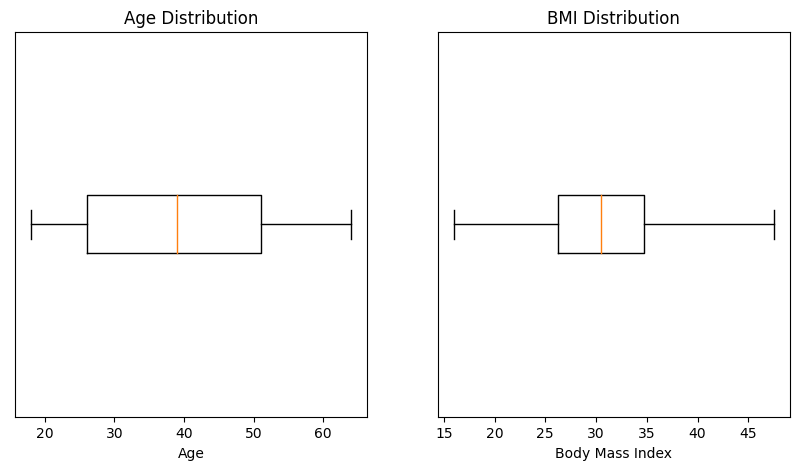

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(train_data.iloc[:,0], vert=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.yticks([])
plt.subplot(1, 2, 2)
plt.boxplot(train_data.iloc[:,2], vert=False, showfliers=False)
plt.title('BMI Distribution')
plt.xlabel('Body Mass Index')
plt.yticks([]) 

<AxesSubplot:title={'center':'Region Distribution'}, ylabel='region'>

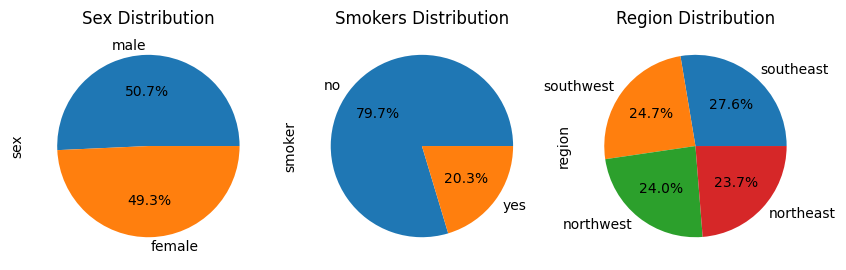

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sex_count = train_data.iloc[:,1].value_counts()
sex_count.plot(kind='pie',title='Sex Distribution', autopct='%1.1f%%')
plt.subplot(1, 3, 2)
smokers_count = train_data.iloc[:,4].value_counts()
smokers_count.plot(kind='pie',title='Smokers Distribution', autopct='%1.1f%%')
plt.subplot(1, 3, 3)
region_count = train_data.iloc[:,5].value_counts()
region_count.plot(kind='pie',title='Region Distribution', autopct='%1.1f%%')

([], [])

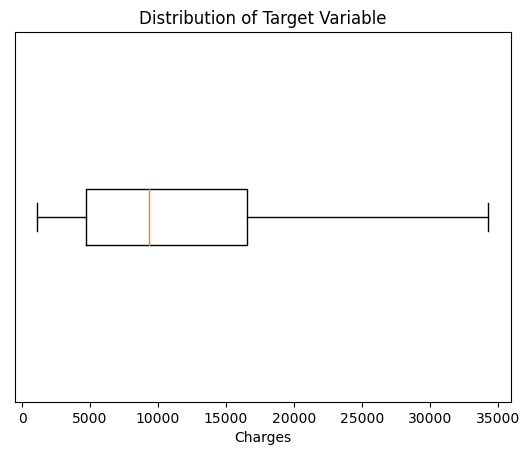

In [16]:
plt.boxplot(train_data.iloc[:,6], vert=False, showfliers=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Charges')
plt.yticks([])

**5. Encoding Categorical Variables**

In [9]:
train_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
train_data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
train_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [10]:
train_data.replace({'region':{'southwest':0, 'northwest':1, 'southeast':2, 'northeast':3}}, inplace=True)
train_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


**6. Splitting Dataset for Training and Testing**

In [21]:
from sklearn.model_selection import train_test_split
input_data = train_data.drop(['charges'], axis=1)
output_data = train_data['charges']                      
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, random_state=10, test_size=0.1)

In [22]:
in_train

,age,sex,bmi,children,smoker,region
2686,45,0,30.360,0,1,2
1468,22,0,37.620,1,1,2
863,36,1,19.855,0,0,3
1084,62,1,30.495,2,0,1
691,47,0,36.200,1,0,0
...,...,...,...,...,...,...
2009,18,0,33.535,0,1,3
1180,42,1,41.325,1,0,3
1344,56,0,40.300,0,0,0
527,51,1,25.800,1,0,0


In [24]:
in_test

,age,sex,bmi,children,smoker,region
879,37,1,29.500,2,0,0
961,29,1,25.900,0,0,0
695,26,1,40.185,0,0,1
176,38,0,27.835,2,0,1
2630,18,0,33.330,0,0,2
...,...,...,...,...,...,...
2594,37,1,25.555,1,1,3
1983,34,1,33.250,1,0,3
181,18,1,38.280,0,0,2
2708,62,0,38.830,0,0,2


**7. Applying Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(in_train, out_train)

LinearRegression()

**8. Testing the model**

In [32]:
out_pred = model.predict(in_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(out_test, out_pred)
mse = mean_squared_error(out_test, out_pred)
r2_score = r2_score(out_test, out_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 score):", r2_score)

Mean Absolute Error (MAE): 3970.870803285988
Mean Squared Error (MSE): 32950472.763556447
R-squared (R2 score): 0.7485468876400667


**9. Deploying the Model**

In [34]:
import pickle as pkl
pkl.dump(model, open('Linear_Regression_model.pkl', 'wb'))